# Applied Time Series Analysis Final Project
### John Hennin, 2021-05-10

#### **Required Packages**
* tswge (Woodward, 2016)
* tuneR (Ligges, 2018)

## Introduction

I am using time series analysis tools to compare and contrast two samples of a song. The two samples in question are the original song (Paich & Porcaro, 1982) and a [cover](https://www.youtube.com/watch?v=jRLfGwQ7Nsw&t=2s) (Pupsi, 2018) that I discovered in my research for this project by an artist named [Pupsi](https://www.youtube.com/c/Pupsi/videos). In Pupsi's version, he uses carved squash and sweet potatoes as the primary instruments, so I am looking for a notable difference between the two music samples that results from these unique instruments. I compare the two renditions both as simply different renditions of the same song (so basic musical differences due to there being two different artists, whether it be timing or frequency), as well as two different renditions with very different instruments. In the [Methods](#methods) section, I load and clip both audio files down to 30 seconds each (the same portion of the song will be used) for easier analysis using the `tuneR` package. I then plot and compare each audio samples' autocorrelation and periodogram using the `tswge` package. Based on periodogram and differences in dominant frequencies between the two samples, I attempt to filter Pupsi's sample to more closely match the dominant frequencies of the original and save the result to a .wav file so I can listen to it. Finally, in the [Discussion/Conclusions](#conclusion) section, I discuss the effects of my work (if my filtering made Pupsi's rendition more similar or less similar, the effects that the food instruments had, etc.).

<a name="methods"></a>
## Methods

### Loading and Preparing the Data for Analysis

In [7]:
install.packages('tswge')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("tuneR", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
library('tswge')

In [10]:
library("tuneR")

#### Original Song by Toto

In [11]:
mp3_file <- "Africa_Toto.mp3"

In [12]:
my_mp3 <- readMP3(mp3_file)
str(my_mp3)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:13023360] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:13023360] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [13]:
# Check audio length (convert seconds to minutes)
num_samples <- length(my_mp3@left)
num_samples / my_mp3@samp.rate / 60

[1] 4.921905

In [14]:
# Pull only the left audio channel
orig <- my_mp3@left

# Cut down to first 10 to 40 seconds section of song 
# (this portion matches the best with the first 30 seconds of Pupsi's rendition)
orig <- orig[10:(40*my_mp3@samp.rate)]

In [15]:
# Convert sound array to values between 1 and -1
orig <- orig / 2^(my_mp3@bit-1)

In [16]:
# Downsampling by 1/16 the sampling rate
idx_orig <- seq(1, (length(orig)-1), 2756)

In [17]:
# Create array of time points for later plotting w/ downsampled data
time_orig <- (0:(length(orig) - 1)) / my_mp3@samp.rate

#### Cover by Pupsi

In [18]:
mp3_file <- "Africa_Pupsi.mp3"

In [19]:
my_mp3 <- readMP3(mp3_file)
str(my_mp3)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:4453632] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:4453632] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [20]:
# Check audio length (convert seconds to minutes)
num_samples <- length(my_mp3@left)
num_samples / my_mp3@samp.rate / 60

[1] 1.683156

In [21]:
# Pull only the left audio channel
pupsi <- my_mp3@left

# Cut down to first 30 seconds of song
pupsi <- pupsi[0:(30*my_mp3@samp.rate)]

In [22]:
# Convert sound array to values between 1 and -1
pupsi <- pupsi / 2^(my_mp3@bit-1)

In [23]:
# Downsampling by 1/16 the sampling rate
idx_pup <- seq(1, (length(pupsi)-1), 2756)

In [24]:
# Create array of time points for later plotting w/ downsampled data
time_pup <- (0:(length(pupsi) - 1)) / my_mp3@samp.rate

#### Filtering Out Frequencies 
(based on plotted results of [Toto's Rendition](#toto) and [Pupsi's Rendition](#pupsi))

In [25]:
# Filter out the frequencies that are present in Pupsi but not in the original

# Filter the 30 second downsampled audio clip (for plotting and analysis)
pupsi.filt <- butterworth.wge(pupsi[idx_pup], type = 'stop', cutoff = c(.385,.395), plot = FALSE)

# Filter the original Wave object
pupsi.filt.full <- butterworth.wge(my_mp3@left, type = 'stop', cutoff = c(.385,.395), plot = FALSE)

#### Save filtered result to .wav file

In [26]:
# Create new Wave object
pupsi.filt.wave <- Wave(pupsi.filt.full, right = numeric(0), samp.rate = 44100, bit = 16, pcm = TRUE)

# Save Wave object
writeWave(pupsi.filt.wave, './Africa_filtered.wav')

Warning message in writeWave(pupsi.filt.wave, "./Africa_filtered.wav"):
“channels' data will be rounded to integers for writing the wave file”


#### Find Dominant Frequencies

In [27]:
# Original version by Toto
orig.period <- period.wge(orig[idx_orig], plot = FALSE)
idx <- which.max(orig.period$pgram)
domfreq.orig <- orig.period$freq[idx]

In [28]:
# Unfiltered verison of Pupsi's rendition
pupsi.period <- period.wge(pupsi[idx_pup], plot = FALSE)
idx <- which.max(pupsi.period$pgram)
domfreq.pupsi <- pupsi.period$freq[idx]

In [29]:
# Filtered verison of Pupsi's rendition
pupsi.filt.period <- period.wge(pupsi.filt$x.filt, plot = FALSE)
idx <- which.max(pupsi.filt.period$pgram)
domfreq.pupsif <- pupsi.filt.period$freq[idx]

## Results

<a name="toto"></a>
#### Original by Toto

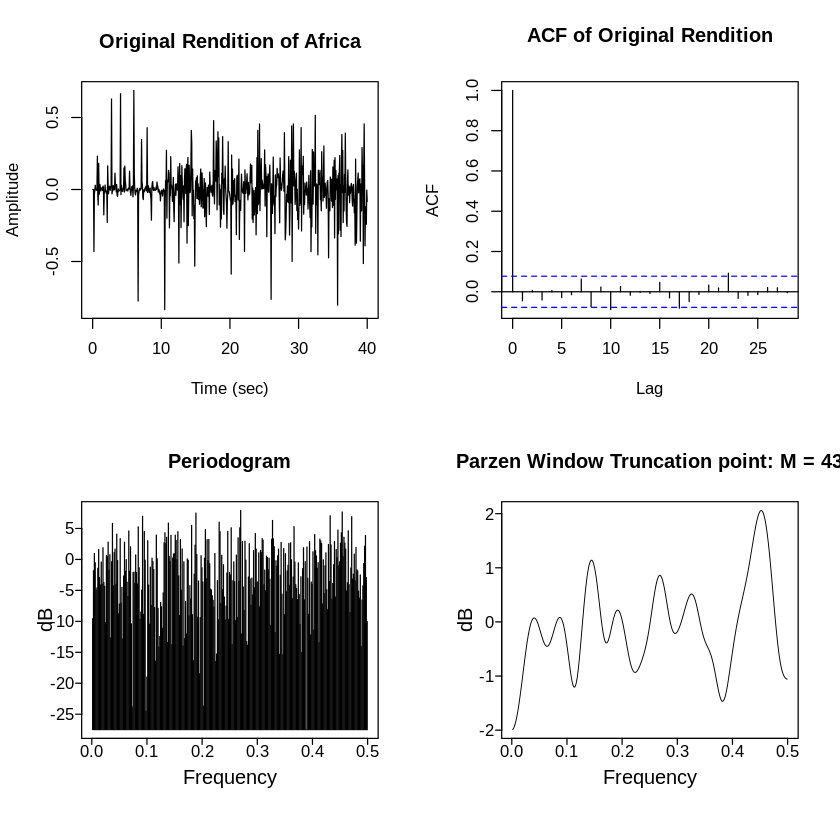

In [30]:
par(mfrow=c(2,2))
plot.orig <- plot(time_orig[idx_orig], orig[idx_orig], type='l', main = "Original Rendition of Africa", ylab = 'Amplitude', xlab = 'Time (sec)')
acf.orig <- acf(orig[idx_orig], main = "ACF of Original Rendition")
period.orig <- period.wge(orig[idx_orig])
parzen.orig <- parzen.wge(orig[idx_orig], trunc = 43)

<a name="pupsi"></a>
#### Cover by Pupsi (unfiltered)

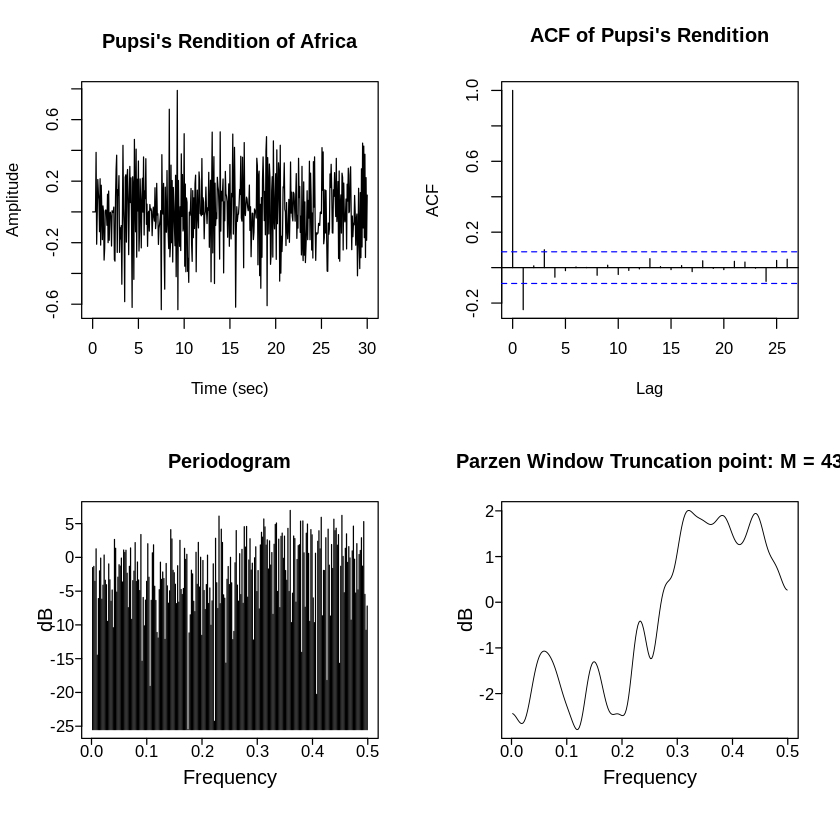

In [31]:
par(mfrow=c(2,2))
plot.pupsi <- plot(time_pup[idx_pup], pupsi[idx_pup], type='l', main = "Pupsi's Rendition of Africa", ylab = 'Amplitude', xlab = 'Time (sec)')
acf.pupsi <- acf(pupsi[idx_pup], main = "ACF of Pupsi's Rendition")
period.pupsi <- period.wge(pupsi[idx_pup])
parzen.pupsi <- parzen.wge(pupsi[idx_pup])

#### Cover by Pupsi (filtered)

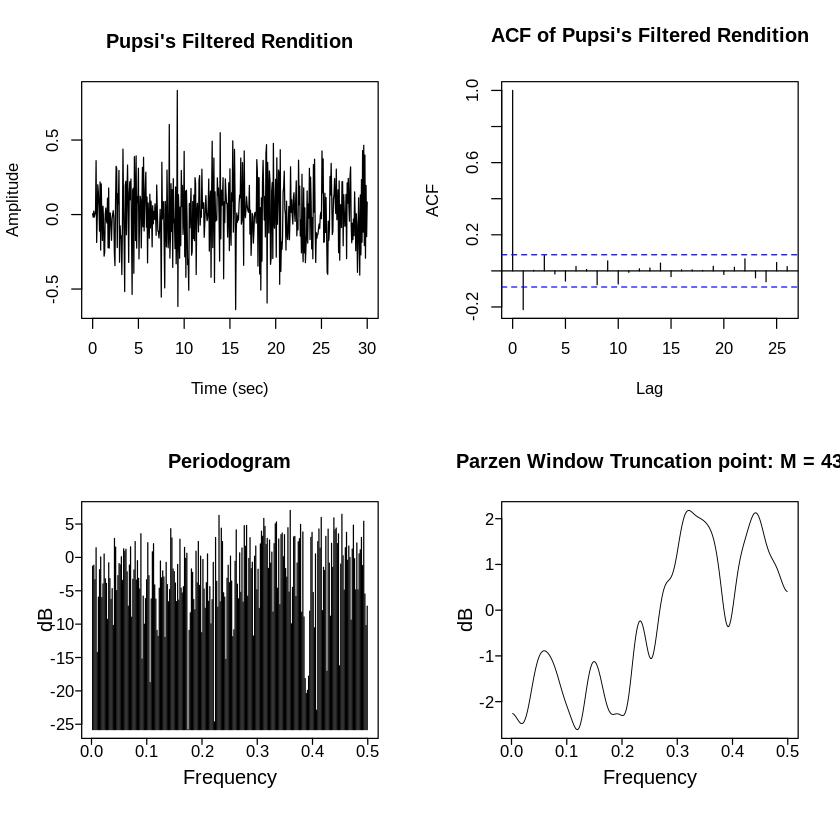

In [32]:
par(mfrow=c(2,2))
plot.pupsi.filt <- plot(time_pup[idx_pup], pupsi.filt$x.filt, type='l', main = "Pupsi's Filtered Rendition", ylab = 'Amplitude', xlab = 'Time (sec)')
acf.pupsi.filt <- acf(pupsi.filt$x.filt, main = "ACF of Pupsi's Filtered Rendition")
period.pupsi.filt <- period.wge(pupsi.filt$x.filt)
parzen.pupsi.filt <- parzen.wge(pupsi.filt$x.filt)


#### Table of Summarized Statistics

In [33]:
Version.30Seconds <- c('Original by Toto', 'Rendition by Pupsi Unfiltered', 'Rendition by Pupsi Filtered')
NumberSamples <- c(length(orig), length(pupsi), length(pupsi.filt.full$x.filt[0:(30*my_mp3@samp.rate)]))
SamplingFrequency <- c(44100, 44100, 44100)
DominantFrequency <- c(domfreq.orig, domfreq.pupsi, domfreq.pupsif)
df <- data.frame(Version.30Seconds, NumberSamples, SamplingFrequency, DominantFrequency)
df

Version.30Seconds,NumberSamples,SamplingFrequency,DominantFrequency
<chr>,<int>,<dbl>,<dbl>
Original by Toto,1763991,44100,0.2698908
Rendition by Pupsi Unfiltered,1323000,44100,0.3596674
Rendition by Pupsi Filtered,1323000,44100,0.3596674


<a name="conclusion"></a>
# Discussion/Conclusion

Given the Parzen Windows of Toto's and Pupsi's versions, it seems that there is a very significant difference between the two renditions. Although audibly they sound *roughly* the same (Pupsi's is much more shrill and airy, most likely due to the homemade quality of his instruments) when the clips are started at 10 seconds for the original and 0 seconds for Pupsi's, the periodograms are drastically different. Toto's Parzen Window is orderly and somewhat seasonal itself, whereas Pupsi's is very disorderly and chaotic. This is likely because of the level of audio treatment Toto's version received as an officially released song. Pupsi's version, however, probably didn't receive the same post-recording treatment. Additionally, Pupsi's unconventional instruments were obviously not as well tuned as Toto's, so in addition to the notes of the song there probably was some unintentional noise. After reviewing the periodograms of both versions, I noticed that Pupsi's version's periodogram had a slight peak from roughly .385 to .395 that wasn't present in Toto's version's periodogram. In an attempt to make the two versions more similar, I filtered out this peak. After listening to and comparing both the unfiltered version of Pupsi's rendition and the filtered version, I cannot say there is a significant/noticeable difference between the two. This is most likely because I chose a very small range of frequencies to filter out (using a band-stop filter). Unfortunately, I couldn't manipulate Pupsi's clip further for it to resemble the original, as frequencies from 0 to .25 were comparatively low (so it wouldn't make sense to filter them out). It is also noteworthy that I chose to take only the left channel of Pupsi's clip (in order to handle stereo sound), so the plots are only of that channel.

# References
1. Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge
1. The Pandas Development Team. (2021). pandas.DataFrame.dropna—Pandas 1.2.4 documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
1. Paich, D. & Porcaro, J. (1982). Africa. On *Toto IV*. Columbia. Retrieved from https://music.apple.com/us/album/africa/185716551?i=185717604
1. Pupsi (2018). Africa. On *Africa - Single*. Retrieved from https://music.apple.com/us/album/africa/1496963458?i=1496963463


